<a href="https://colab.research.google.com/github/rahuld11/ANN_with_TensorFlow/blob/master/Topic_Modeling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
with open('/lotr.txt', 'r',encoding='cp1252') as lotr:
  lotr = lotr.read()

In [7]:
df=lotr
type(df)

str

In [8]:
red_rev_string = "".join(df)



```
# This is formatted as code
```

## Tokenization

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from nltk.tokenize import sent_tokenize
tokenize_sent = sent_tokenize(red_rev_string)

In [11]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [12]:
a = stopwords.words('english')

wordnet = WordNetLemmatizer()

In [13]:
filtered_split=[]
for i in range(len(tokenize_sent)):
    review = re.sub("[^A-Za-z" "]+"," ",tokenize_sent[i])
    review = re.sub("[0-9" "]+"," ",tokenize_sent[i])
    review =review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_split.append(review)

## Word-Cloud

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
cloud = " ".join(filtered_split)

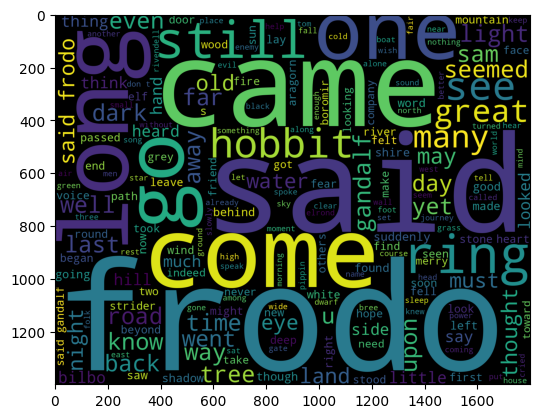

In [16]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cloud)

plt.imshow(wordcloud)

## N - Gram

In [17]:
##N-Gram
corpus=filtered_split
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                       reverse=True)
    return words_freq[:n]

In [19]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=25)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
top_df.head(25)

,Word,Freq
0,said,1472
1,frodo,1093
2,it,656
3,gandalf,462
4,could,438
5,you,428
6,would,423
7,came,421
8,long,420
9,come,410


<ipython-input-20-375df09c887f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'said'),
 Text(1, 0, 'frodo'),
 Text(2, 0, 'it'),
 Text(3, 0, 'gandalf'),
 Text(4, 0, 'could'),
 Text(5, 0, 'you'),
 Text(6, 0, 'would'),
 Text(7, 0, 'came'),
 Text(8, 0, 'long'),
 Text(9, 0, 'come'),
 Text(10, 0, 'one'),
 Text(11, 0, 'go'),
 Text(12, 0, 'sam'),
 Text(13, 0, 'like'),
 Text(14, 0, 'him'),
 Text(15, 0, 'ring'),
 Text(16, 0, 'back'),
 Text(17, 0, 'many'),
 Text(18, 0, 'great'),
 Text(19, 0, 'away'),
 Text(20, 0, 'them'),
 Text(21, 0, 'far'),
 Text(22, 0, 'still'),
 Text(23, 0, 'know'),
 Text(24, 0, 'dark')]

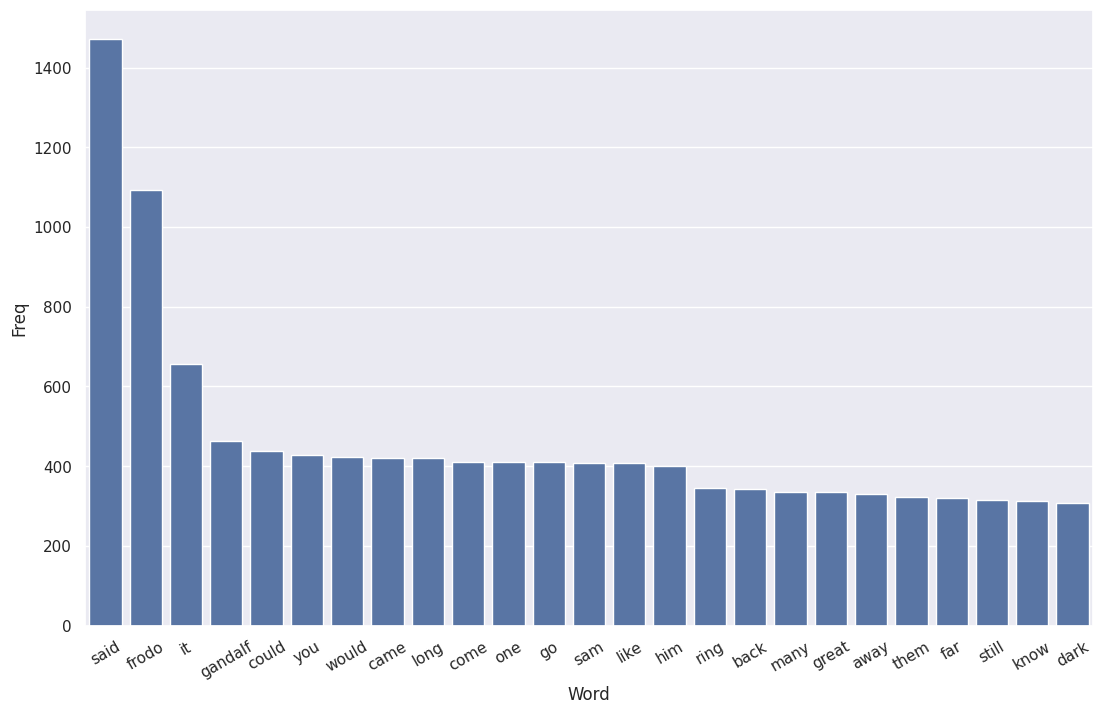

In [20]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

## Bi- Gram

In [21]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [22]:
#Convert most freq words to dataframe for plotting bar plot
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

         Bi-gram  Freq
0     said frodo   217
1   said gandalf   135
2      could see    66
3   said aragorn    65
4       said sam    61
5     said merry    58
6        bag end    54
7    said pippin    54
8       long ago    51
9   said strider    51
10      far away    49
11      mr frodo    40
12   asked frodo    39
13     come back    38
14    said gimli    38
15  said boromir    37
16   mina tirith    34
17    said bilbo    32
18    could seen    30
19  tom bombadil    27


<ipython-input-23-2355ba9532d6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=45)


[Text(0, 0, 'said frodo'),
 Text(1, 0, 'said gandalf'),
 Text(2, 0, 'could see'),
 Text(3, 0, 'said aragorn'),
 Text(4, 0, 'said sam'),
 Text(5, 0, 'said merry'),
 Text(6, 0, 'bag end'),
 Text(7, 0, 'said pippin'),
 Text(8, 0, 'long ago'),
 Text(9, 0, 'said strider'),
 Text(10, 0, 'far away'),
 Text(11, 0, 'mr frodo'),
 Text(12, 0, 'asked frodo'),
 Text(13, 0, 'come back'),
 Text(14, 0, 'said gimli'),
 Text(15, 0, 'said boromir'),
 Text(16, 0, 'mina tirith'),
 Text(17, 0, 'said bilbo'),
 Text(18, 0, 'could seen'),
 Text(19, 0, 'tom bombadil')]

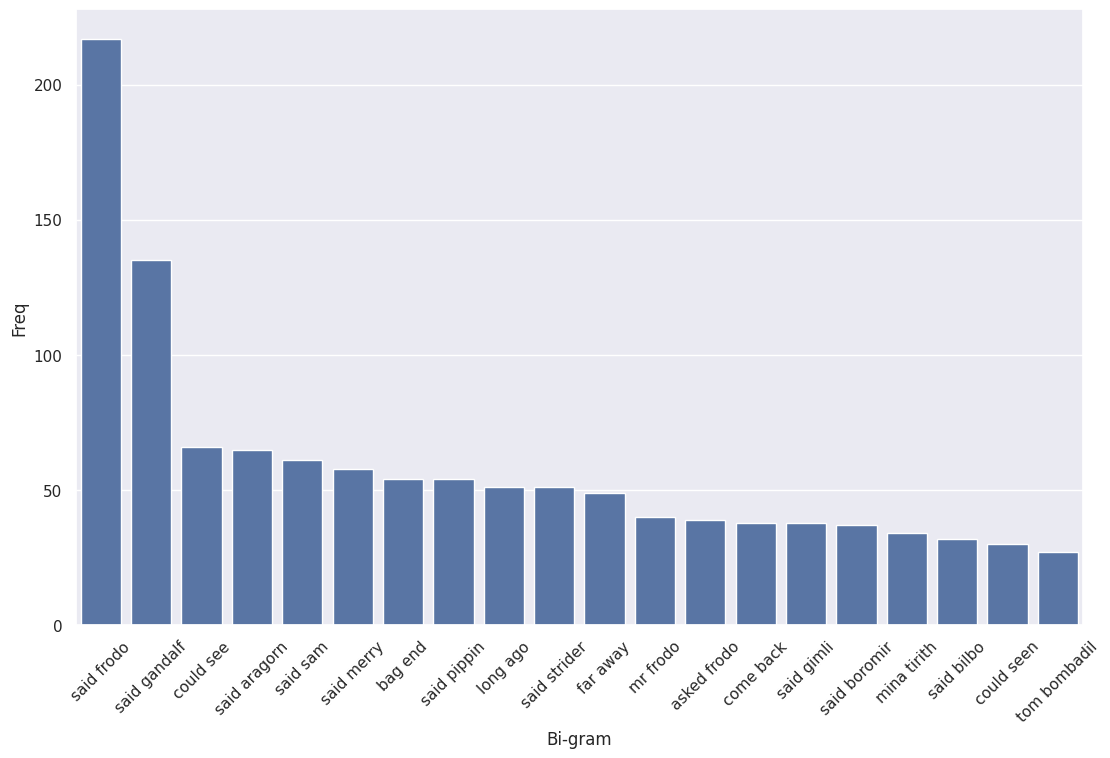

In [23]:
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

## Tri-Gram

In [35]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [36]:
#Convert most freq words to dataframe for plotting bar plot
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

                Tri-gram  Freq
0       said gandalf and     9
1         said frodo but     9
2          it said frodo     8
3      said mr butterbur     8
4   aragorn son arathorn     8
5         sam said frodo     7
6        frodo could see     7
7         very well said     6
8     said frodo looking     6
9     nothing could seen     6
10       gimli son glóin     6
11       mean said frodo     5
12          sir said sam     5
13       know said frodo     5
14            it is said     5
15     could see nothing     5
16      old tom bombadil     5
17        old man willow     5
18        said low voice     5
19         poor old bill     5


<ipython-input-37-1fa3b1f3d56f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  j.set_xticklabels(j.get_xticklabels(), rotation=45)


[Text(0, 0, 'said gandalf and'),
 Text(1, 0, 'said frodo but'),
 Text(2, 0, 'it said frodo'),
 Text(3, 0, 'said mr butterbur'),
 Text(4, 0, 'aragorn son arathorn'),
 Text(5, 0, 'sam said frodo'),
 Text(6, 0, 'frodo could see'),
 Text(7, 0, 'very well said'),
 Text(8, 0, 'said frodo looking'),
 Text(9, 0, 'nothing could seen'),
 Text(10, 0, 'gimli son glóin'),
 Text(11, 0, 'mean said frodo'),
 Text(12, 0, 'sir said sam'),
 Text(13, 0, 'know said frodo'),
 Text(14, 0, 'it is said'),
 Text(15, 0, 'could see nothing'),
 Text(16, 0, 'old tom bombadil'),
 Text(17, 0, 'old man willow'),
 Text(18, 0, 'said low voice'),
 Text(19, 0, 'poor old bill')]

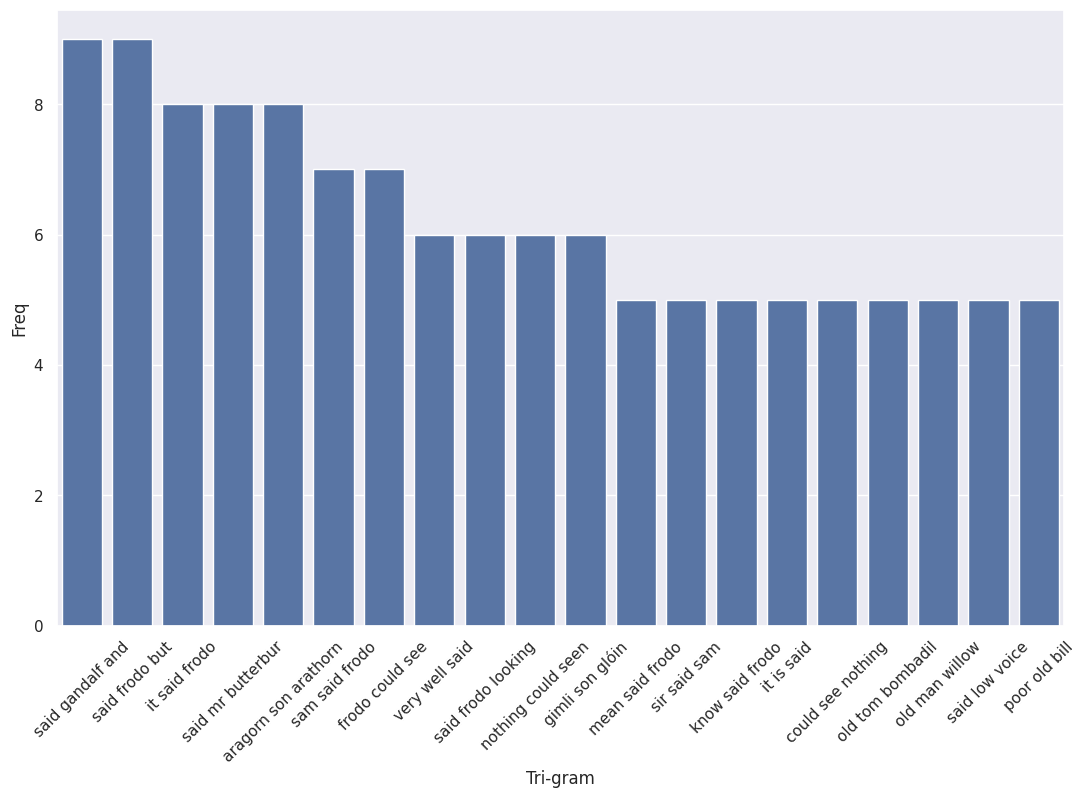

In [37]:
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## TF-IDF

In [43]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tvec_ta = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [45]:
tvec_weights_ta = tvec_ta.fit_transform(filtered_split)

In [46]:
weights_ta = np.asarray(tvec_weights_ta.mean(axis=0)).ravel().tolist()

In [48]:
weights_df_ta = pd.DataFrame({'term': tvec_ta.get_feature_names_out(), 'weight': weights_ta})

In [49]:
weights_df_ta=weights_df_ta.sort_values(by='weight', ascending=False)
weights_df_ta.head(10)

,term,weight
5473,said,0.036010
2607,frodo,0.022552
2664,gandalf,0.013207
1170,come,0.012468
5483,sam,0.010911
3589,know,0.009840
5332,ring,0.008759
869,came,0.008610
3835,long,0.008543
3759,like,0.007696


## LDA

In [50]:
##LDA
import numpy as np
import spacy
#nlp = spacy.load("en")
import os, re, operator, warnings

In [51]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [53]:
dataset = [d.split() for d in filtered_split]

In [55]:
from gensim.corpora import Dictionary

In [56]:
dictionary = Dictionary(dataset)

In [57]:
##Corpus
corpus = [dictionary.doc2bow(text) for text in dataset]

In [59]:
from gensim import models

In [61]:
lsi_model = models.LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [63]:
from gensim.models import HdpModel

In [64]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [65]:
hdptopics = hdpmodel.show_topics(formatted=False)
hdptopics

[(0,
  [('said', 0.001073125838034506),
   ('would', 0.0008361792455194536),
   ('light', 0.0008261409033191492),
   ('came', 0.0007639795047673525),
   ('could', 0.0007216486147166891),
   ('black', 0.0007205169962318859),
   ('far', 0.0007140098813210158),
   ('u', 0.0006830487657914722),
   ('go', 0.0006237579876919786),
   ('still', 0.0006106796186217922),
   ('frodo', 0.0006012990917224878),
   ('must', 0.0005801454840685655),
   ('come', 0.00057485879770271),
   ('long', 0.0005493306615296523),
   ('yet', 0.0005331194364915705),
   ('shadow', 0.0005169616861988756),
   ('gear;', 0.0005077406713276529),
   ('cannot', 0.0005072223126327371),
   ('seemed', 0.0005051921800184623),
   ('boat', 0.0005031679529836883)]),
 (1,
  [('said', 0.0009523754445744188),
   ('could', 0.0009139807881920151),
   ('long', 0.0007092247165906409),
   ('shire-hobbits', 0.0006144533618202534),
   ('great', 0.000607609991147869),
   ('would', 0.0006025778452622161),
   ('from.', 0.0005942347284026667),
 

In [68]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [69]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  #Perplexity:-10.570245062218794


Perplexity:  -10.567639119895857


In [70]:
from gensim.models import LdaModel

In [71]:
##Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=filtered_split, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


In [72]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(dataset)
texts = dataset

In [73]:
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1)]]


In [74]:
id2word[0]

'announced'

In [75]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('announced', 1),
  ('bag', 1),
  ('baggins', 1),
  ('bilbo', 1),
  ('birthday', 1),
  ('celebrating', 1),
  ('eleventy-first', 1),
  ('end', 1),
  ('excitement', 1),
  ('hobbiton.', 1),
  ('long-expected', 1),
  ('magnificence,', 1),
  ('mr.', 1),
  ('much', 1),
  ('party', 2),
  ('shortly', 1),
  ('special', 1),
  ('talk', 1),
  ('would', 1)]]

In [76]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [77]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [78]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

In [79]:
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.039*"could" + 0.038*"great" + 0.037*"would" + 0.034*"boat" + 0.026*"land" + 0.024*"set" + 0.022*"end" + 0.022*"path" + 0.022*"shore," + 0.020*"water,"'), (1, '0.077*"\'" + 0.075*"said" + 0.037*"behind" + 0.031*"bring" + 0.028*"like" + 0.023*"shall" + 0.021*"must" + 0.020*"u" + 0.019*"even" + 0.017*"know"'), (2, '0.036*"came" + 0.026*"saw" + 0.025*"back" + 0.023*"water" + 0.022*"eye" + 0.021*"went" + 0.019*"time" + 0.019*"light" + 0.016*"heard" + 0.016*"thought"'), (3, '0.080*"frodo" + 0.058*"out," + 0.036*"still" + 0.035*"one" + 0.022*"last" + 0.021*"elf" + 0.018*"`and" + 0.014*"legolas" + 0.013*"old" + 0.013*"can\'t"'), (4, '0.061*"upon" + 0.061*"drew" + 0.048*"hid" + 0.027*"see" + 0.022*"cannot" + 0.021*"day" + 0.021*"passed" + 0.018*"him," + 0.017*"company" + 0.016*"it,"'), (5, '0.055*"sam" + 0.042*"many" + 0.036*"looked" + 0.033*"boromir" + 0.031*"hand" + 0.025*"lay" + 0.024*"need" + 0.023*"them." + 0.021*"never" + 0.020*"think"'), (6, '0.084*"grey" + 0.070*"well" + 0.064*"

In [84]:
# Compute Perplexity
 # a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) #Perplexity:  -10.815504794343834


Perplexity:  -11.072517519050521


In [85]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda) #Coherence Score:  0.4060880825058167


Coherence Score:  0.3976839926210113
